In [25]:
import pandas as pd
import datetime

In [26]:
df = pd.read_csv(r"C:\Users\Tony\Documents\GitHub\mea511\project\wy16_21.csv")
df

,Date,Max T (F),Min T (F),Avg T (F),Precipitation (inches),Precipitation (mm)
0,12/1/2016,52,38,45,0.18,4.57
1,12/2/2016,47,39,43,0.17,4.32
2,12/3/2016,51,43,47,0.55,13.97
3,12/4/2016,50,39,44.5,0.74,18.8
4,12/5/2016,50,34,42,0.55,13.97
...,...,...,...,...,...,...
536,2/24/2022,41,26,33.5,0,0
537,2/25/2022,46,26,36,0,0
538,2/26/2022,50,28,39,0,0
539,2/27/2022,48,38,43,0.8,20.32


In [27]:
# Print column names
df.columns

Index(['Date', 'Max T (F)', 'Min T (F)', 'Avg T (F)', 'Precipitation (inches)',
       'Precipitation (mm)'],
      dtype='object')

In [28]:
# Convert date to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Convert other columns to floats
df['Max T (F)'] = pd.to_numeric(df['Max T (F)'], errors='coerce')
df['Min T (F)'] = pd.to_numeric(df['Min T (F)'], errors='coerce')
df['Avg T (F)'] = pd.to_numeric(df['Avg T (F)'], errors='coerce')
df['Precipitation (inches)'] = pd.to_numeric(df['Precipitation (inches)'], errors='coerce')
df['Precipitation (mm)'] = pd.to_numeric(df['Precipitation (mm)'], errors='coerce')

In [31]:
# Filter for days w/ precip >= 0.15 inches
df_parsed = df[df['Precipitation (inches)'] >= 0.15]
df_parsed

,Date,Max T (F),Min T (F),Avg T (F),Precipitation (inches),Precipitation (mm)
0,2016-12-01,52.0,38.0,45.0,0.18,4.57
1,2016-12-02,47.0,39.0,43.0,0.17,4.32
2,2016-12-03,51.0,43.0,47.0,0.55,13.97
3,2016-12-04,50.0,39.0,44.5,0.74,18.80
4,2016-12-05,50.0,34.0,42.0,0.55,13.97
...,...,...,...,...,...,...
526,2022-02-14,59.0,33.0,46.0,0.20,5.08
532,2022-02-20,47.0,38.0,42.5,0.48,12.19
533,2022-02-21,46.0,35.0,40.5,0.20,5.08
539,2022-02-27,48.0,38.0,43.0,0.80,20.32


In [33]:
df_parsed = df_parsed.sort_values('Date')

# Calculate the difference in days between consecutive dates
df_parsed['Date_Diff'] = df_parsed['Date'].diff().dt.days

# Assign an event_id by cumulatively summing where the difference is greater than 1
df_parsed['event_id'] = (df_parsed['Date_Diff'] > 1).cumsum() + 1

# Drop the Date_Diff column as it's no longer needed
df_parsed = df_parsed.drop(columns=['Date_Diff'])

df_parsed

,Date,Max T (F),Min T (F),Avg T (F),Precipitation (inches),Precipitation (mm),event_id
0,2016-12-01,52.0,38.0,45.0,0.18,4.57,1
1,2016-12-02,47.0,39.0,43.0,0.17,4.32,1
2,2016-12-03,51.0,43.0,47.0,0.55,13.97,1
3,2016-12-04,50.0,39.0,44.5,0.74,18.80,1
4,2016-12-05,50.0,34.0,42.0,0.55,13.97,1
...,...,...,...,...,...,...,...
526,2022-02-14,59.0,33.0,46.0,0.20,5.08,89
532,2022-02-20,47.0,38.0,42.5,0.48,12.19,90
533,2022-02-21,46.0,35.0,40.5,0.20,5.08,90
539,2022-02-27,48.0,38.0,43.0,0.80,20.32,91


<Axes: ylabel='Frequency'>

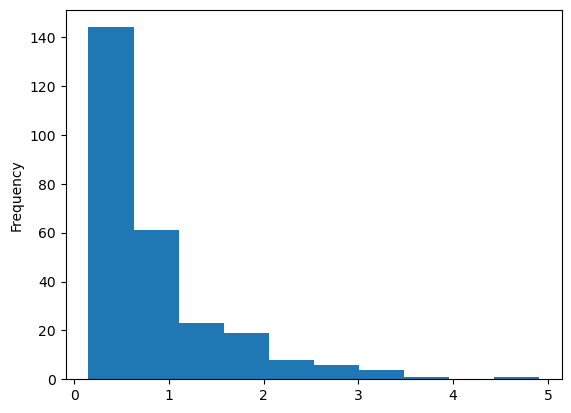

In [42]:
df_parsed['Precipitation (inches)'].plot(kind="hist")

<Axes: title={'center': 'Precipitation Events'}, xlabel='Date'>

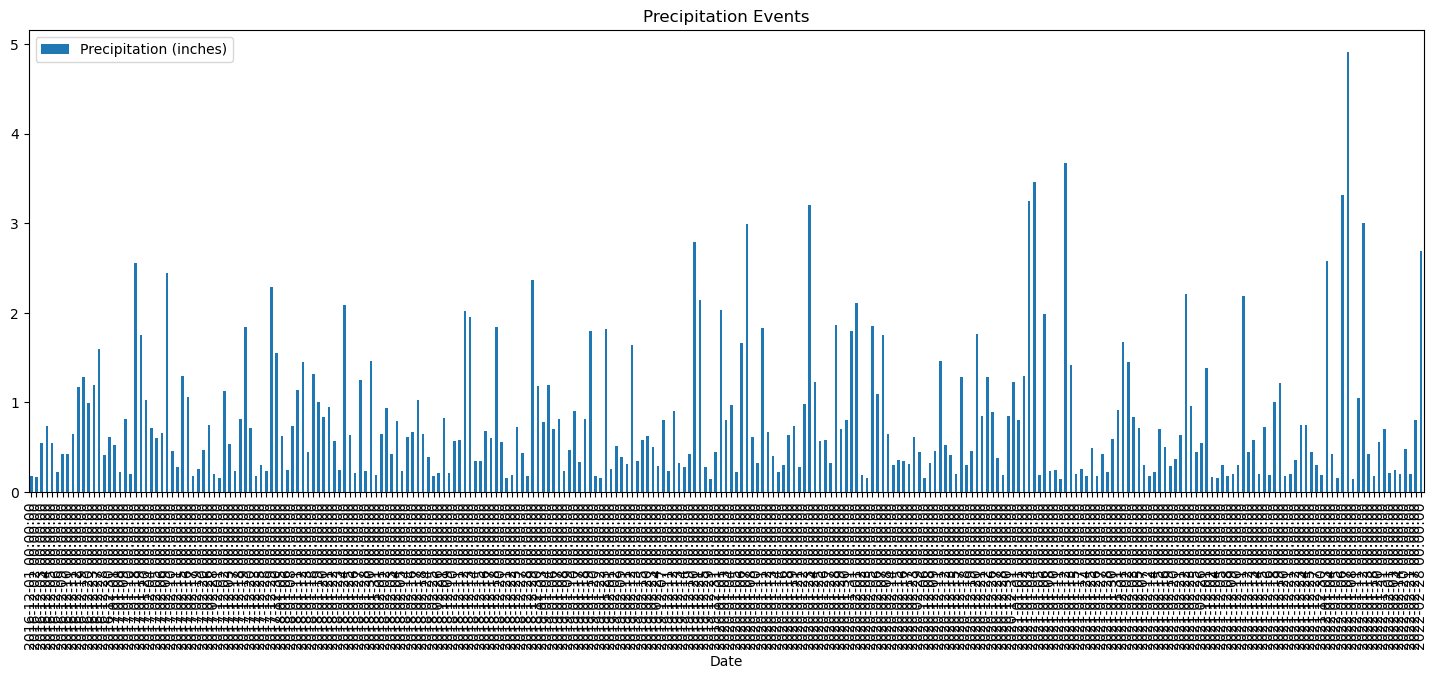

In [41]:
df_parsed.plot(x='Date', y='Precipitation (inches)', kind='bar', title='Precipitation Events', figsize=(18, 6))

In [43]:
df_parsed.to_csv('precip_events.csv', index=False)